## ANALYSIS OF DATA IMPORTED FROM GEPHI-AUSTRALIA

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\GEPHI EXPORT\Australia_GEPHI_EXPORT.csv")

df.sort_values("Degree", axis=0, ascending=False,inplace=True, na_position='first')

In [3]:
df

Rank   Id           Label    country        lat         lon  Degree  \
0       1  SYD     Sydney (AU)  Australia -33.946111  151.177222      81   
1       2  BNE        Brisbane  Australia -27.455031  153.035093      68   
2       3  MEL  Melbourne (AU)  Australia -37.673333  144.843333      50   
3       4  PER           Perth  Australia -32.000000  115.900000      50   
4       5  CNS          Cairns  Australia -16.887840  145.763331      48   
..    ...  ...             ...        ...        ...         ...     ...   
130   131  DPO       Devonport  Australia -41.192668  146.331102       2   
131   132  EPR       Esperance  Australia -33.857307  121.888897       2   
132   133  KAX        Kalbarri  Australia -27.666181  114.166664       2   
133   134  KGC       Kingscote  Australia -35.713889  137.521389       2   
153   154  XTG    Thargomindah  Australia -27.999959  143.816689       2   

     Weighted Degree  Eccentricity  betweenesscentrality  componentnumber  \
0            1875535             5           7999.896104                0   
1            1046351             5           8012.392929                0   
2            1507608             5           2896.915945                0   
3             413500             5           5221.800794                0   
4             268367             5           7395.265152                0   
..               ...           ...                   ...              ...   
130            13104             6              0.000000                0   
131             4600             6              0.000000                0   
132              190             6              0.000000                0   
133             3546             6              0.000000                0   
153              342             9              0.000000                0   

     strongcompnum  modularity_class  stat_inf_class  clustering  \
0                0               393               1    0.073171   
1                0               393               3    0.092063   
2                0               393               1    0.165000   
3                0               393               0    0.092308   
4                0               393               5    0.094203   
..             ...               ...             ...         ...   
130              0               393               1    0.000000   
131              0               393               0    0.000000   
132              0               393               0    0.000000   
133              0               393               2    0.000000   
153              0                71               3    0.000000   

     eigencentrality  giantcomponent  
0           1.000000               3  
1           0.883924               3  
2           0.815257               3  
3           0.566654               3  
4           0.588757               3  
..               ...             ...  
130         0.077854               3  
131         0.054891               3  
132         0.054891               3  
133         0.057010               3  
153         0.000340               3  

[154 rows x 17 columns]

C:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Degree(Log Scale) vs Betweenness(Log Scale)')

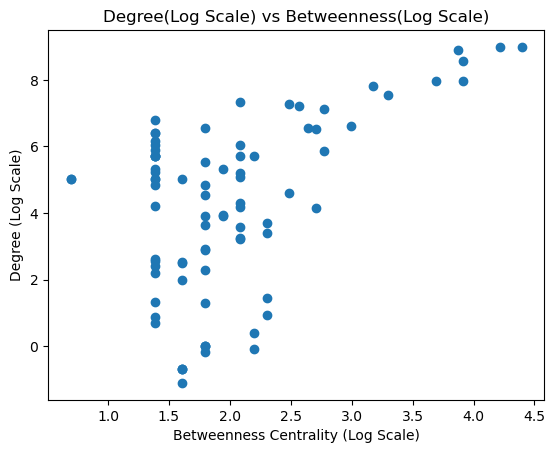

In [4]:
import seaborn as sns
import numpy as np

x=np.log(df.Degree)
y=np.log(df.betweenesscentrality)
# Basic correlogram
plt.plot(x,y,'o')
plt.xlabel('Betweenness Centrality (Log Scale)')
plt.ylabel('Degree (Log Scale)')
plt.title('Degree(Log Scale) vs Betweenness(Log Scale)')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


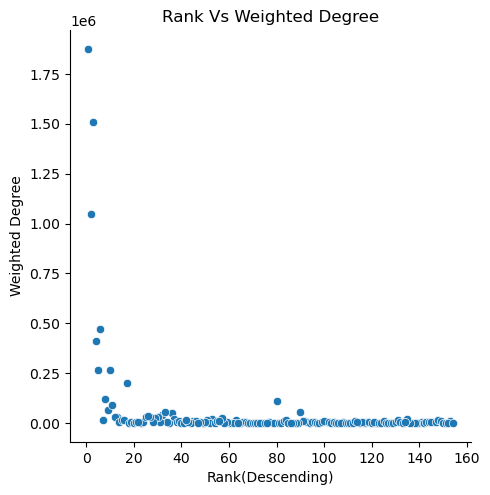

In [5]:
A=df.Rank

y= np.log(df['Weighted Degree'])
plot= sns.relplot(A,df['Weighted Degree'])
plot.set(xlabel ="Rank(Descending)", ylabel = "Weighted Degree", title ='Rank Vs Weighted Degree')

In [6]:
A=np.log(A)
sns.regplot(A,y)


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rank', ylabel='Weighted Degree'>

In [7]:
plt.plot(df.Rank,df.Degree)


C:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


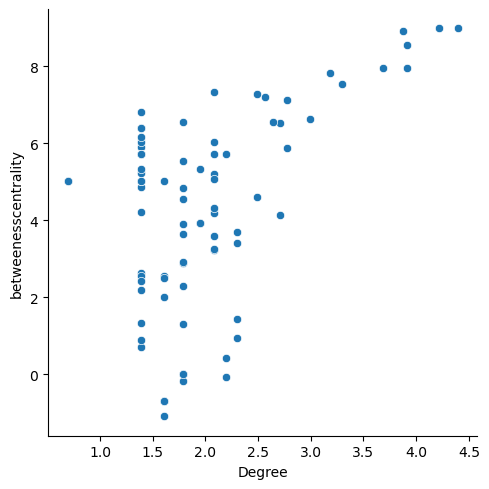

In [8]:
y=np.log(df['betweenesscentrality'])
x= np.log(df['Degree'])
sns.relplot(x,y)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


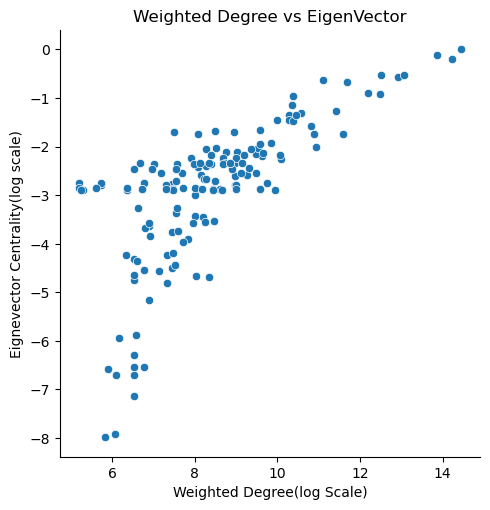

In [9]:
x=np.log(df['Weighted Degree'])
y= np.log(df['eigencentrality'])
plot= sns.relplot(x,y)
plot.set(xlabel ="Weighted Degree(log Scale)", ylabel = "Eignevector Centrality(log scale)", title ='Weighted Degree vs EigenVector')

In [10]:
##replacing all Nan values with Zeros 
new_df=df.fillna(0)
new_df

Rank   Id           Label    country        lat         lon  Degree  \
0       1  SYD     Sydney (AU)  Australia -33.946111  151.177222      81   
1       2  BNE        Brisbane  Australia -27.455031  153.035093      68   
2       3  MEL  Melbourne (AU)  Australia -37.673333  144.843333      50   
3       4  PER           Perth  Australia -32.000000  115.900000      50   
4       5  CNS          Cairns  Australia -16.887840  145.763331      48   
..    ...  ...             ...        ...        ...         ...     ...   
130   131  DPO       Devonport  Australia -41.192668  146.331102       2   
131   132  EPR       Esperance  Australia -33.857307  121.888897       2   
132   133  KAX        Kalbarri  Australia -27.666181  114.166664       2   
133   134  KGC       Kingscote  Australia -35.713889  137.521389       2   
153   154  XTG    Thargomindah  Australia -27.999959  143.816689       2   

     Weighted Degree  Eccentricity  betweenesscentrality  componentnumber  \
0            1875535             5           7999.896104                0   
1            1046351             5           8012.392929                0   
2            1507608             5           2896.915945                0   
3             413500             5           5221.800794                0   
4             268367             5           7395.265152                0   
..               ...           ...                   ...              ...   
130            13104             6              0.000000                0   
131             4600             6              0.000000                0   
132              190             6              0.000000                0   
133             3546             6              0.000000                0   
153              342             9              0.000000                0   

     strongcompnum  modularity_class  stat_inf_class  clustering  \
0                0               393               1    0.073171   
1                0               393               3    0.092063   
2                0               393               1    0.165000   
3                0               393               0    0.092308   
4                0               393               5    0.094203   
..             ...               ...             ...         ...   
130              0               393               1    0.000000   
131              0               393               0    0.000000   
132              0               393               0    0.000000   
133              0               393               2    0.000000   
153              0                71               3    0.000000   

     eigencentrality  giantcomponent  
0           1.000000               3  
1           0.883924               3  
2           0.815257               3  
3           0.566654               3  
4           0.588757               3  
..               ...             ...  
130         0.077854               3  
131         0.054891               3  
132         0.054891               3  
133         0.057010               3  
153         0.000340               3  

[154 rows x 17 columns]

In [11]:
new_df=df.fillna({'temperature':0,'windspeed':0,'event':'no event'})

In [12]:
new_df

Rank   Id           Label    country        lat         lon  Degree  \
0       1  SYD     Sydney (AU)  Australia -33.946111  151.177222      81   
1       2  BNE        Brisbane  Australia -27.455031  153.035093      68   
2       3  MEL  Melbourne (AU)  Australia -37.673333  144.843333      50   
3       4  PER           Perth  Australia -32.000000  115.900000      50   
4       5  CNS          Cairns  Australia -16.887840  145.763331      48   
..    ...  ...             ...        ...        ...         ...     ...   
130   131  DPO       Devonport  Australia -41.192668  146.331102       2   
131   132  EPR       Esperance  Australia -33.857307  121.888897       2   
132   133  KAX        Kalbarri  Australia -27.666181  114.166664       2   
133   134  KGC       Kingscote  Australia -35.713889  137.521389       2   
153   154  XTG    Thargomindah  Australia -27.999959  143.816689       2   

     Weighted Degree  Eccentricity  betweenesscentrality  componentnumber  \
0            1875535             5           7999.896104                0   
1            1046351             5           8012.392929                0   
2            1507608             5           2896.915945                0   
3             413500             5           5221.800794                0   
4             268367             5           7395.265152                0   
..               ...           ...                   ...              ...   
130            13104             6              0.000000                0   
131             4600             6              0.000000                0   
132              190             6              0.000000                0   
133             3546             6              0.000000                0   
153              342             9              0.000000                0   

     strongcompnum  modularity_class  stat_inf_class  clustering  \
0                0               393               1    0.073171   
1                0               393               3    0.092063   
2                0               393               1    0.165000   
3                0               393               0    0.092308   
4                0               393               5    0.094203   
..             ...               ...             ...         ...   
130              0               393               1    0.000000   
131              0               393               0    0.000000   
132              0               393               0    0.000000   
133              0               393               2    0.000000   
153              0                71               3    0.000000   

     eigencentrality  giantcomponent  
0           1.000000               3  
1           0.883924               3  
2           0.815257               3  
3           0.566654               3  
4           0.588757               3  
..               ...             ...  
130         0.077854               3  
131         0.054891               3  
132         0.054891               3  
133         0.057010               3  
153         0.000340               3  

[154 rows x 17 columns]

In [13]:
new_df= df.fillna(method="bfill")

In [14]:
new_df

Rank   Id           Label    country        lat         lon  Degree  \
0       1  SYD     Sydney (AU)  Australia -33.946111  151.177222      81   
1       2  BNE        Brisbane  Australia -27.455031  153.035093      68   
2       3  MEL  Melbourne (AU)  Australia -37.673333  144.843333      50   
3       4  PER           Perth  Australia -32.000000  115.900000      50   
4       5  CNS          Cairns  Australia -16.887840  145.763331      48   
..    ...  ...             ...        ...        ...         ...     ...   
130   131  DPO       Devonport  Australia -41.192668  146.331102       2   
131   132  EPR       Esperance  Australia -33.857307  121.888897       2   
132   133  KAX        Kalbarri  Australia -27.666181  114.166664       2   
133   134  KGC       Kingscote  Australia -35.713889  137.521389       2   
153   154  XTG    Thargomindah  Australia -27.999959  143.816689       2   

     Weighted Degree  Eccentricity  betweenesscentrality  componentnumber  \
0            1875535             5           7999.896104                0   
1            1046351             5           8012.392929                0   
2            1507608             5           2896.915945                0   
3             413500             5           5221.800794                0   
4             268367             5           7395.265152                0   
..               ...           ...                   ...              ...   
130            13104             6              0.000000                0   
131             4600             6              0.000000                0   
132              190             6              0.000000                0   
133             3546             6              0.000000                0   
153              342             9              0.000000                0   

     strongcompnum  modularity_class  stat_inf_class  clustering  \
0                0               393               1    0.073171   
1                0               393               3    0.092063   
2                0               393               1    0.165000   
3                0               393               0    0.092308   
4                0               393               5    0.094203   
..             ...               ...             ...         ...   
130              0               393               1    0.000000   
131              0               393               0    0.000000   
132              0               393               0    0.000000   
133              0               393               2    0.000000   
153              0                71               3    0.000000   

     eigencentrality  giantcomponent  
0           1.000000               3  
1           0.883924               3  
2           0.815257               3  
3           0.566654               3  
4           0.588757               3  
..               ...             ...  
130         0.077854               3  
131         0.054891               3  
132         0.054891               3  
133         0.057010               3  
153         0.000340               3  

[154 rows x 17 columns]

In [15]:
## Interpolate

In [16]:
new_df= df.interpolate()

In [17]:
new_df

Rank   Id           Label    country        lat         lon  Degree  \
0       1  SYD     Sydney (AU)  Australia -33.946111  151.177222      81   
1       2  BNE        Brisbane  Australia -27.455031  153.035093      68   
2       3  MEL  Melbourne (AU)  Australia -37.673333  144.843333      50   
3       4  PER           Perth  Australia -32.000000  115.900000      50   
4       5  CNS          Cairns  Australia -16.887840  145.763331      48   
..    ...  ...             ...        ...        ...         ...     ...   
130   131  DPO       Devonport  Australia -41.192668  146.331102       2   
131   132  EPR       Esperance  Australia -33.857307  121.888897       2   
132   133  KAX        Kalbarri  Australia -27.666181  114.166664       2   
133   134  KGC       Kingscote  Australia -35.713889  137.521389       2   
153   154  XTG    Thargomindah  Australia -27.999959  143.816689       2   

     Weighted Degree  Eccentricity  betweenesscentrality  componentnumber  \
0            1875535             5           7999.896104                0   
1            1046351             5           8012.392929                0   
2            1507608             5           2896.915945                0   
3             413500             5           5221.800794                0   
4             268367             5           7395.265152                0   
..               ...           ...                   ...              ...   
130            13104             6              0.000000                0   
131             4600             6              0.000000                0   
132              190             6              0.000000                0   
133             3546             6              0.000000                0   
153              342             9              0.000000                0   

     strongcompnum  modularity_class  stat_inf_class  clustering  \
0                0               393               1    0.073171   
1                0               393               3    0.092063   
2                0               393               1    0.165000   
3                0               393               0    0.092308   
4                0               393               5    0.094203   
..             ...               ...             ...         ...   
130              0               393               1    0.000000   
131              0               393               0    0.000000   
132              0               393               0    0.000000   
133              0               393               2    0.000000   
153              0                71               3    0.000000   

     eigencentrality  giantcomponent  
0           1.000000               3  
1           0.883924               3  
2           0.815257               3  
3           0.566654               3  
4           0.588757               3  
..               ...             ...  
130         0.077854               3  
131         0.054891               3  
132         0.054891               3  
133         0.057010               3  
153         0.000340               3  

[154 rows x 17 columns]

In [18]:
new_df= new_df.fillna(method="bfill")

In [19]:
new_df

Rank   Id           Label    country        lat         lon  Degree  \
0       1  SYD     Sydney (AU)  Australia -33.946111  151.177222      81   
1       2  BNE        Brisbane  Australia -27.455031  153.035093      68   
2       3  MEL  Melbourne (AU)  Australia -37.673333  144.843333      50   
3       4  PER           Perth  Australia -32.000000  115.900000      50   
4       5  CNS          Cairns  Australia -16.887840  145.763331      48   
..    ...  ...             ...        ...        ...         ...     ...   
130   131  DPO       Devonport  Australia -41.192668  146.331102       2   
131   132  EPR       Esperance  Australia -33.857307  121.888897       2   
132   133  KAX        Kalbarri  Australia -27.666181  114.166664       2   
133   134  KGC       Kingscote  Australia -35.713889  137.521389       2   
153   154  XTG    Thargomindah  Australia -27.999959  143.816689       2   

     Weighted Degree  Eccentricity  betweenesscentrality  componentnumber  \
0            1875535             5           7999.896104                0   
1            1046351             5           8012.392929                0   
2            1507608             5           2896.915945                0   
3             413500             5           5221.800794                0   
4             268367             5           7395.265152                0   
..               ...           ...                   ...              ...   
130            13104             6              0.000000                0   
131             4600             6              0.000000                0   
132              190             6              0.000000                0   
133             3546             6              0.000000                0   
153              342             9              0.000000                0   

     strongcompnum  modularity_class  stat_inf_class  clustering  \
0                0               393               1    0.073171   
1                0               393               3    0.092063   
2                0               393               1    0.165000   
3                0               393               0    0.092308   
4                0               393               5    0.094203   
..             ...               ...             ...         ...   
130              0               393               1    0.000000   
131              0               393               0    0.000000   
132              0               393               0    0.000000   
133              0               393               2    0.000000   
153              0                71               3    0.000000   

     eigencentrality  giantcomponent  
0           1.000000               3  
1           0.883924               3  
2           0.815257               3  
3           0.566654               3  
4           0.588757               3  
..               ...             ...  
130         0.077854               3  
131         0.054891               3  
132         0.054891               3  
133         0.057010               3  
153         0.000340               3  

[154 rows x 17 columns]